In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import dtale
%matplotlib inline

In [2]:
cov=pd.read_csv("covid19.csv")
cov.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [3]:
cov.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe
49067,NaN,Lesotho,-29.610000,28.233600,2020-07-27,505,12,128,365,Africa


In [4]:
cov.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


In [5]:
cov.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')

In [6]:
cov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [7]:
cov['Date']=pd.to_datetime(cov.Date)
cov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


In [8]:
cov.drop(columns=(['Lat','Long']), inplace=True)

In [9]:
cov=cov.rename(columns=
               {'Province/State':'Province_State',
                'Country/Region':'Country_Region',
                'WHO Region':'WHO_Region'
               })

In [10]:
cov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province_State  14664 non-null  object        
 1   Country_Region  49068 non-null  object        
 2   Date            49068 non-null  datetime64[ns]
 3   Confirmed       49068 non-null  int64         
 4   Deaths          49068 non-null  int64         
 5   Recovered       49068 non-null  int64         
 6   Active          49068 non-null  int64         
 7   WHO_Region      49068 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 3.0+ MB


# to find the percentage of null values

In [11]:
cov.isnull().mean()*100

Province_State    70.114943
Country_Region     0.000000
Date               0.000000
Confirmed          0.000000
Deaths             0.000000
Recovered          0.000000
Active             0.000000
WHO_Region         0.000000
dtype: float64

In [12]:
cov.drop(columns='Province_State', inplace = True)

In [13]:
cov['year']=pd.DatetimeIndex(cov.Date).year
cov['month']=pd.DatetimeIndex(cov.Date).month
cov['day']=pd.DatetimeIndex(cov.Date).day
cov.head()

,Country_Region,Date,Confirmed,Deaths,Recovered,Active,WHO_Region,year,month,day
0,Afghanistan,2020-01-22,0,0,0,0,Eastern Mediterranean,2020,1,22
1,Albania,2020-01-22,0,0,0,0,Europe,2020,1,22
2,Algeria,2020-01-22,0,0,0,0,Africa,2020,1,22
3,Andorra,2020-01-22,0,0,0,0,Europe,2020,1,22
4,Angola,2020-01-22,0,0,0,0,Africa,2020,1,22


In [14]:
cov.drop(columns='Date', inplace = True)

In [15]:
cov.year.unique()

array([2020], dtype=int64)

In [16]:
cov.head()

,Country_Region,Confirmed,Deaths,Recovered,Active,WHO_Region,year,month,day
0,Afghanistan,0,0,0,0,Eastern Mediterranean,2020,1,22
1,Albania,0,0,0,0,Europe,2020,1,22
2,Algeria,0,0,0,0,Africa,2020,1,22
3,Andorra,0,0,0,0,Europe,2020,1,22
4,Angola,0,0,0,0,Africa,2020,1,22


In [17]:
cov['month']=cov['month'].replace({1:'JAN',2:'FEB',3:'MAR',4:'APR',5:'MAY',6:'JUN',7:'JUL',8:'AUG',9:'SEP',10:'OCT',11:'NOV',12:'DEC'})

In [18]:
cov

,Country_Region,Confirmed,Deaths,Recovered,Active,WHO_Region,year,month,day
0,Afghanistan,0,0,0,0,Eastern Mediterranean,2020,JAN,22
1,Albania,0,0,0,0,Europe,2020,JAN,22
2,Algeria,0,0,0,0,Africa,2020,JAN,22
3,Andorra,0,0,0,0,Europe,2020,JAN,22
4,Angola,0,0,0,0,Africa,2020,JAN,22
...,...,...,...,...,...,...,...,...,...
49063,Sao Tome and Principe,865,14,734,117,Africa,2020,JUL,27
49064,Yemen,1691,483,833,375,Eastern Mediterranean,2020,JUL,27
49065,Comoros,354,7,328,19,Africa,2020,JUL,27
49066,Tajikistan,7235,60,6028,1147,Europe,2020,JUL,27


<AxesSubplot: xlabel='Country_Region'>

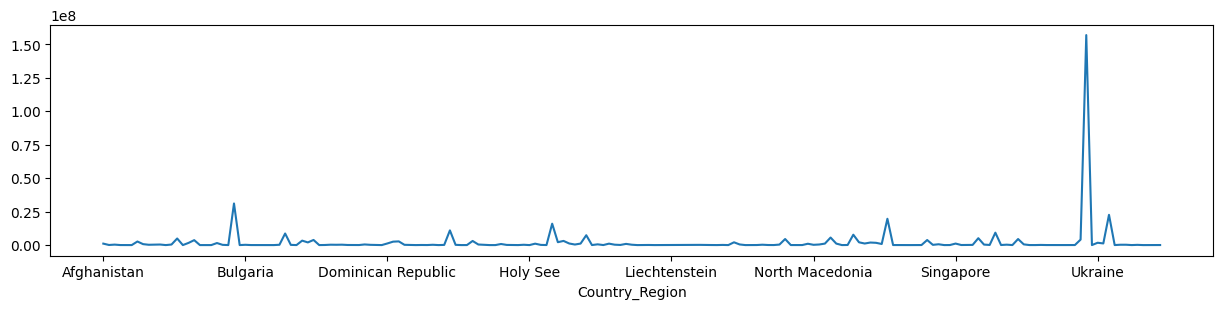

In [19]:
cov.groupby('Country_Region')['Active'].sum().plot.line(figsize=(15,3))

<AxesSubplot: ylabel='Active'>

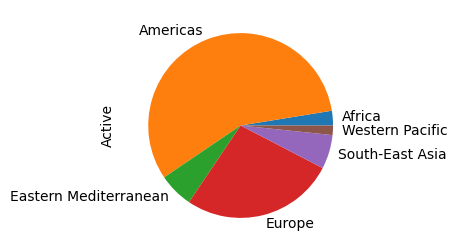

In [20]:
cov.groupby('WHO_Region')['Active'].sum().plot.pie(figsize=(10, 3))

<AxesSubplot: ylabel='Deaths'>

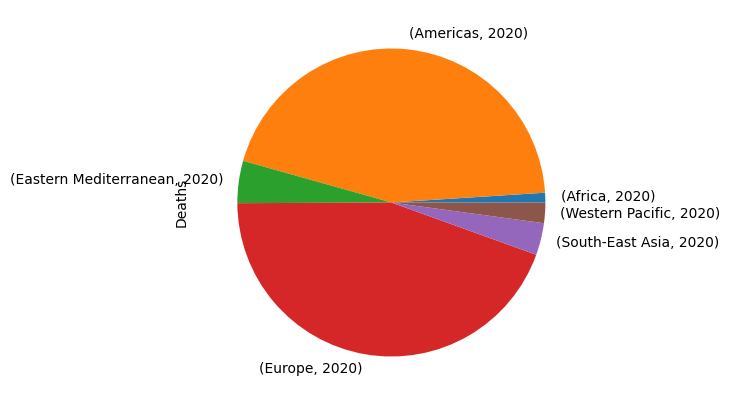

In [21]:
cov.groupby(['WHO_Region','year'])['Deaths'].sum().plot.pie(figsize=(10, 5))

<AxesSubplot: ylabel='WHO_Region'>

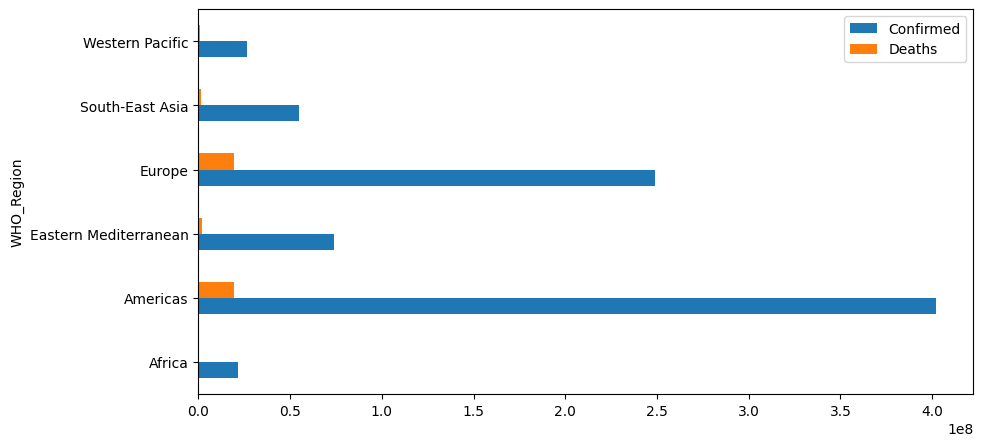

In [22]:

cov.groupby('WHO_Region')[['Confirmed', 'Deaths']].sum().plot.barh(figsize=(10, 5))


<AxesSubplot: xlabel='WHO_Region'>

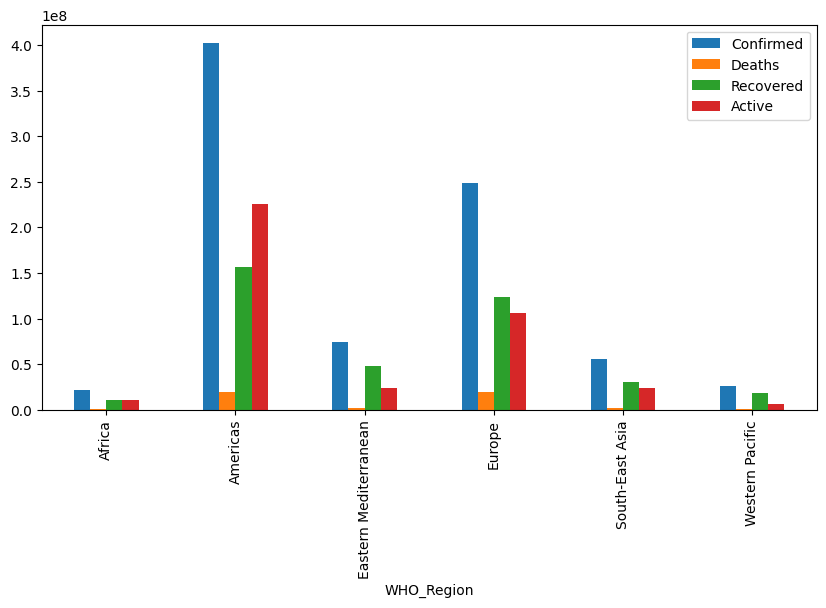

In [23]:
cov.groupby('WHO_Region')[['Confirmed', 'Deaths','Recovered','Active']].sum().plot.bar(figsize=(10, 5))

<AxesSubplot: xlabel='Country_Region'>

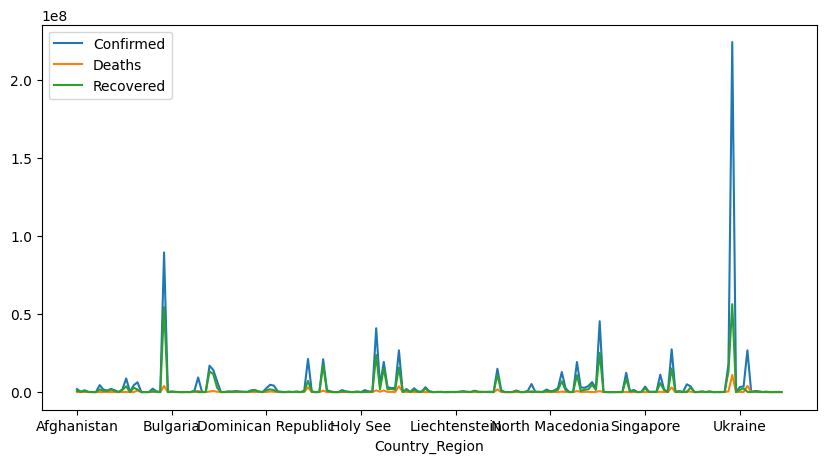

In [24]:
cov.groupby('Country_Region')[['Confirmed', 'Deaths','Recovered']].sum().plot.line(figsize=(10, 5))

In [25]:
cov.sample(3)

,Country_Region,Confirmed,Deaths,Recovered,Active,WHO_Region,year,month,day
42685,Kuwait,48672,360,39276,9036,Eastern Mediterranean,2020,JUL,3
44503,Ireland,25589,1744,23364,481,Europe,2020,JUL,10
45595,Poland,38457,1588,27756,9113,Europe,2020,JUL,14


<AxesSubplot: xlabel='Active', ylabel='Density'>

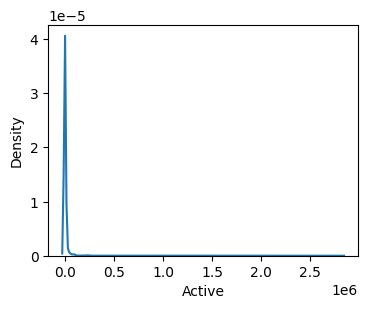

In [26]:
plt.figure(figsize=(4,3))
sns.kdeplot(data=cov.Active)